## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Claudio A. A. Mikhael


In [8]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [12]:
# Read Data from remote link

url= 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
ca_data= pd.read_csv(url)
print(' The data successfully imported')

ca_data

 The data successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


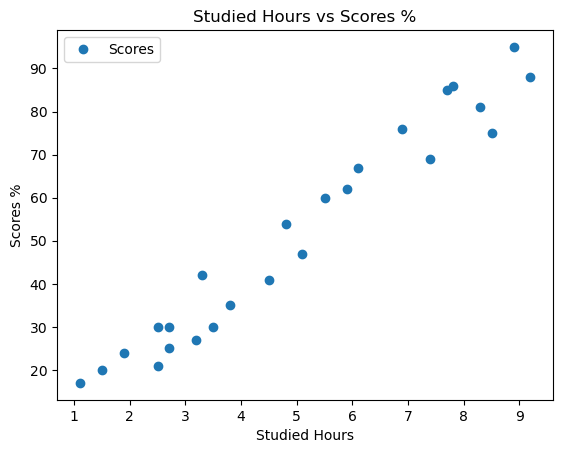

In [13]:
# Plotting the distribution of scores on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

ca_data.plot(x='Hours', y='Scores', style='o')
plt.title('Studied Hours vs Scores %')
plt.xlabel('Studied Hours')
plt.ylabel('Scores %')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
#selecting all the  datasets in the first column except the last one.

x= ca_data.iloc[:,:-1].values
#selecting all the  datasets in the second column except the last one.

y=ca_data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0 )

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [16]:
#Training the Algorithm.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print('Training Complete')

Training Complete


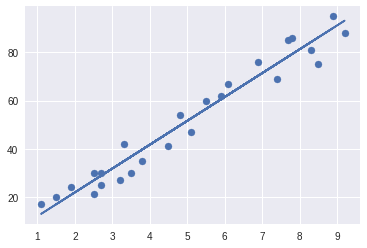

In [0]:
## Plotting the regression line
line= regressor.coef_*x+regressor.intercept_

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
#it's time to make some predictions and test the alogorithm.

print(x_test)
y_prediction= regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]]


In [18]:
#comparing the actual vs predicted

df= pd.DataFrame({'Actual':y_test, 'predicted':y_prediction})
df

,Actual,predicted
0,20,14.973540
1,27,31.811747
2,69,73.412023
3,30,24.878368
4,62,58.554782
5,35,37.754644
6,24,18.935471
7,86,77.373954
8,76,68.459609
9,17,11.011609


In [22]:
# My own test
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.73595402298852


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
#The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))

Mean Absolute Error: 5.710484526967277
